In [5]:

#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Comparing Two Samples

In [ ]:
#Read the file baby.csv
births = pd.read_csv('Datasets/baby.csv')
births

In [5]:
#create a new table only with Maternal Smoker and Birth Weight
smoking_and_birthweight = births[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [6]:
#Determine the number of non smokers and smokers
smoking_and_birthweight.groupby('Maternal Smoker').size()

,0
Maternal Smoker,
False,715
True,459


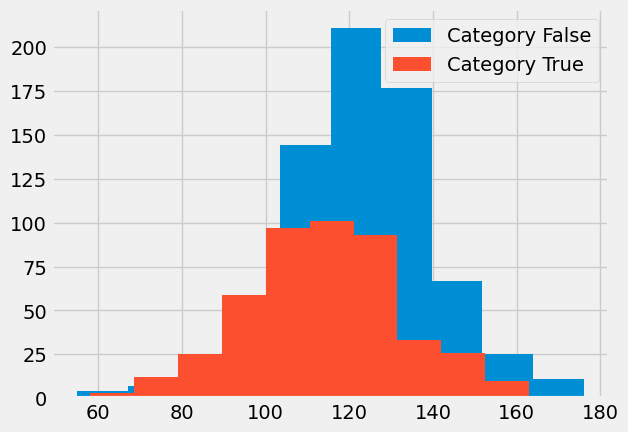

In [7]:
#plot the grouped data into a histogram
grouped = smoking_and_birthweight.groupby('Maternal Smoker')
for category, group in grouped:
  plots.hist(group['Birth Weight'],label = f'Category {category}')

plots. legend()

# Test Statistic

[Question] What values of our statistic are in favor of the alternative: positive or negative?

In [9]:
#Determine the mean of the birth weight for smokers vs non-smokers

mean_table = smoking_and_birthweight.groupby('Maternal Smoker').mean()
mean_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [11]:
#What is the difference between the birth weight for smokers and non-smokers
observed_difference = mean_table.iloc[1,:]-mean_table.iloc[0,:]
observed_difference.to_numpy()[0]

np.float64(-9.266142572024918)

In [12]:
#Create a function to input a table, a label and group label. which would then determine the label difference grouped by the values in group label
def difference_of_means(table, label, group_label):


  reduced = table[[label, group_label]]

  mean_table = reduced.groupby(group_label).mean()
  means_difference = mean_table.iloc[1,:]-mean_table.iloc[0,:]

  return means_difference.to_numpy()[0]



In [13]:
#Let's test this function
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')




np.float64(-9.266142572024918)

# Random Permutation (Shuffling)

In [14]:
#Let's create a table
letters = pd.DataFrame({'letter': ['a', 'b', 'c', 'd', 'e']})
letters


,letter
0,a
1,b
2,c
3,d
4,e


In [19]:
letters.sample(5)

,letter
2,c
0,a
4,e
3,d
1,b


In [20]:
#Let's shuffle with replacement
letters.sample(5, replace=True)

,letter
1,b
1,b
3,d
2,c
4,e


In [21]:
#Let's shuffle without replacement
letters.sample(5)

,letter
4,e
1,b
0,a
2,c
3,d


In [22]:
#Let's put the shuffle without replacement as a column into the table, letters.
shuffled_letters = letters.sample(5)
letters['Shuffled'] = shuffled_letters['letter'].values
letters

,letter,Shuffled
0,a,d
1,b,c
2,c,a
3,d,e
4,e,b


# Simulation Under Null Hypothesis

In [23]:
#Call table smoking_and_birthweight
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [26]:
#Create an array with maternal smoker column being shuffled
shuffled_labels = np.random.permutation(smoking_and_birthweight['Maternal Smoker'])
shuffled_labels

array([ True, False,  True, ..., False, False, False])

In [27]:
#Create a new table original_and_shuffled and add the shuffled labels as a column
#Create a new table original_and_shuffled and add the shuffled labels as a column
original_and_shuffled = smoking_and_birthweight
original_and_shuffled['Shuffled Label'] = shuffled_labels
original_and_shuffled

/tmp/ipython-input-3942282608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_and_shuffled['Shuffled Label'] = shuffled_labels


,Maternal Smoker,Birth Weight,Shuffled Label
0,False,120,True
1,False,113,False
2,True,128,True
3,True,108,False
4,False,136,False
...,...,...,...
1169,False,113,True
1170,False,128,True
1171,True,130,False
1172,False,125,False


In [32]:
#determine the difference mean in birth weight for shuffled label
difference_of_means(original_and_shuffled,'Birth Weight','Shuffled Label')

np.float64(-0.33374773374774236)

In [33]:
#determine the difference mean in birth weight for Maternal smoker
difference_of_means(original_and_shuffled,'Birth Weight','Maternal Smoker')

np.float64(-9.266142572024918)

# Permutation Test

In [34]:
#Let's put this all into a function
def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""

    # array of shuffled labels
    shuffled_labels = np.random.permutation(table[group_label])

    # table of numerical variable and shuffled labels
    table['Shuffled Label'] = shuffled_labels

    return difference_of_means(table, label, 'Shuffled Label')

In [45]:
#Test this function
one_simulated_difference(births, 'Birth Weight','Maternal Smoker')

np.float64(0.403165897283543)

In [46]:
#Let's run this multiple times
differences = []
for i in np.arange(2500):
  new_difference = one_simulated_difference(births, 'Birth Weight','Maternal Smoker')
  differences.append(new_difference)


Observed Difference: Birth Weight   -9.266143
dtype: float64


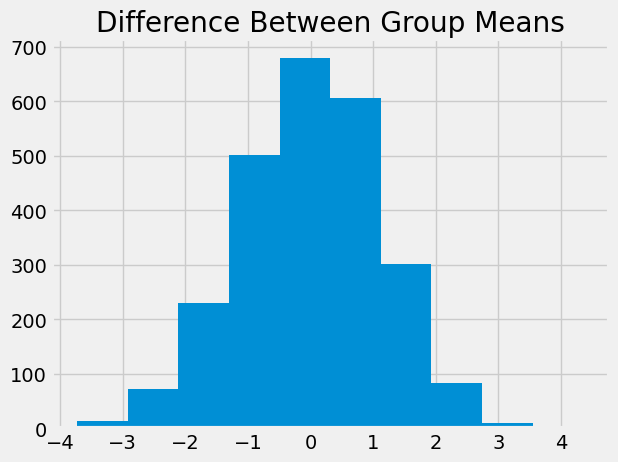

In [47]:
#Let's plot the distribution from the results above
table = pd.DataFrame({'Difference Between Group Means' : differences})
table.hist('Difference Between Group Means')

print('Observed Difference:', observed_difference)